## This project consists of two parts.

### Part 1
We will work on techniques for prioritizing hypotheses using the ICE and RICE frameworks. Consider the features of each framework and the result of its application for business.

data - hypothesis.csv

    Hypothesis - a brief description of the hypothesis; 
    Reach - user coverage on a 10-point scale;
    Impact - impact on users on a 10-point scale;
    Confidence - confidence in the hypothesis on a 10-point scale;
    Efforts - the cost of resources to test the hypothesis on a 10-point scale. The larger the Efforts value, the more expensive the hypothesis test.

### Part 2
Using the data of the test, you will need to analyze the results and decide what to do with the test: 
1. Stop the test, record the victory of one of the groups. 
2. Stop the test, record the absence of differences between groups. 
3. Continue the test.

data - orders.csv

    transactionId - order identifier;
    visitorId - identifier of the user who made the order;
    date — date when the order was made;
    revenue — order revenue;
    group — the A/B test group the order belongs to.

data - visitors.csv

    date - date;
    group — A/B test group;
    visitors - the number of users on the specified date in the specified A/B test group



In [88]:
# Importing Libraries

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

### Part one code:

In [89]:
# Importing data
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Add two new channels to attract traffic, which will attract 30% more users",3,10,8,6
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,5,4,10
2,Add product recommendation blocks to the online store website to increase conversion and average check of the order,8,3,7,3
3,"Change the structure of categories, which will increase the conversion, because. users will find the right product faster",8,3,3,8
4,Change the homepage background color to increase user engagement,3,1,1,1
5,"Add a customer reviews page about the store, which will increase the number of orders",3,2,2,3
6,Show banners with current promotions and sales on the main page to increase conversion,5,3,8,3
7,Add a subscription form to all main pages to build a customer base for email newsletters,10,7,8,5
8,Launch a promotion that gives a discount on goods on your birthday,1,9,9,5


In [90]:
# Updating headers of the table
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(2)

,hypothesis,reach,impact,confidence,efforts
0,"Add two new channels to attract traffic, which will attract 30% more users",3,10,8,6
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,5,4,10


In [91]:
# Let's use the ICE framework to prioritize hypotheses. Sort by descending priority.
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))


                                                                                                                  hypothesis   
8                                                         Launch a promotion that gives a discount on goods on your birthday  \
0                                                 Add two new channels to attract traffic, which will attract 30% more users   
7                                   Add a subscription form to all main pages to build a customer base for email newsletters   
6                                     Show banners with current promotions and sales on the main page to increase conversion   
2        Add product recommendation blocks to the online store website to increase conversion and average check of the order   
1                                            Launch your own delivery service, which will reduce the delivery time of orders   
5                                      Add a customer reviews page about the store, which will increase 

In [92]:
# Let's use the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                                                                                                  hypothesis   
7                                   Add a subscription form to all main pages to build a customer base for email newsletters  \
2        Add product recommendation blocks to the online store website to increase conversion and average check of the order   
0                                                 Add two new channels to attract traffic, which will attract 30% more users   
6                                     Show banners with current promotions and sales on the main page to increase conversion   
8                                                         Launch a promotion that gives a discount on goods on your birthday   
3  Change the structure of categories, which will increase the conversion, because. users will find the right product faster   
1                                            Launch your own delivery service, which will reduce the del

In [93]:
# How has the prioritization of hypotheses changed when RICE was used instead of ICE?
pd.options.display.max_colwidth = 200
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Add two new channels to attract traffic, which will attract 30% more users",3,10,8,6,13.33,40.0
1,"Launch your own delivery service, which will reduce the delivery time of orders",2,5,4,10,2.00,4.0
2,Add product recommendation blocks to the online store website to increase conversion and average check of the order,8,3,7,3,7.00,56.0
3,"Change the structure of categories, which will increase the conversion, because. users will find the right product faster",8,3,3,8,1.12,9.0
4,Change the homepage background color to increase user engagement,3,1,1,1,1.00,3.0
5,"Add a customer reviews page about the store, which will increase the number of orders",3,2,2,3,1.33,4.0
6,Show banners with current promotions and sales on the main page to increase conversion,5,3,8,3,8.00,40.0
7,Add a subscription form to all main pages to build a customer base for email newsletters,10,7,8,5,11.20,112.0
8,Launch a promotion that gives a discount on goods on your birthday,1,9,9,5,16.20,16.2


#### Part one conclusion:
After prioritization using the RICE framework, task 7 shifted to the first place - this happened because this task has an indicator reach = 10 - that is, this task has the widest coverage (it will affect the most users compared to others, and if 10 is the maximum score - then all users) - therefore it must be performed first.

When prioritizing using the ICE method, we did not take into account such an indicator as coverage. The RICE method takes into account - hence the difference in priority lists for ICE and RICE

### Part two code:

In [94]:
# Importing data

orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [95]:
orders.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


In [96]:
visitors.head(3)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [97]:
# let's build a funtion for duplicate checks
def duplicate_check(source):

    dubl = source.duplicated().sum()
    result = f'Number of duplicates: {dubl}'

    return result

In [98]:
# Let's check data for duplicates
duplicate_check(visitors)


'Number of duplicates: 0'

In [99]:
# Let's check data for duplicates
duplicate_check(orders)

'Number of duplicates: 0'

In [100]:
# Let's see some additional info about the data like gaps and types
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [101]:
# Let's modify format of the date

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))



visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(orders.head())
print(visitors.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


    Data does not contain duplicates
    Data does not contain gaps
    Data types do not need to be changed at this time.

In [102]:
# Creating an array of unique pairs of date values and test groups

datesGroups = orders[['date','group']].drop_duplicates()

In [103]:
# Getting aggregated cumulative data on orders by day
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transactionId' : 'nunique', 
            'visitorId' : 'nunique', 
            'revenue' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

In [104]:
# Getting aggregated daily visitor data
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [105]:
# # combine cumulative data in one table and give its columns meaningful names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#### Charts


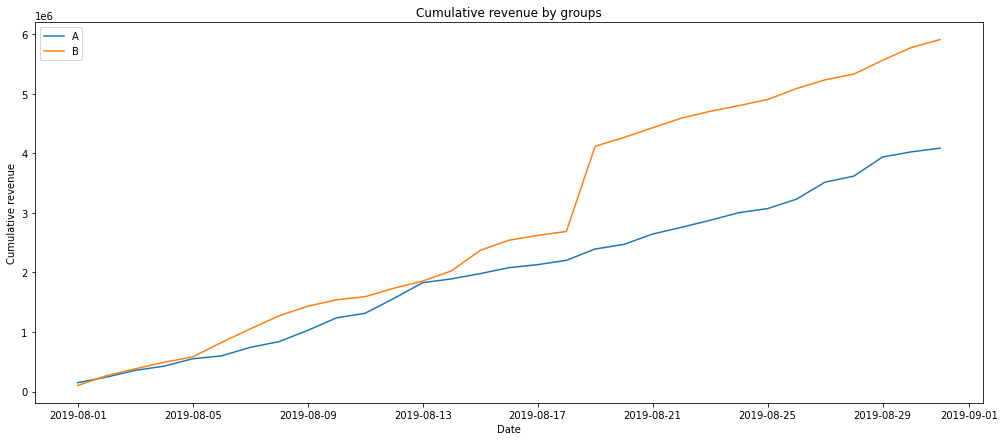

In [106]:
# Let's build graphs of cumulative revenue by days and groups of A/B testing:

# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(17, 7))

# Building a graph for group А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Building a graph for group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Cumulative revenue')
plt.xlabel('Date')
plt.title('Cumulative revenue by groups')
plt.legend()

Segment A behaves stably throughout the test

Segment B behaved stably until the middle of the test, then there was a sharp advance of segment A, after which stable behavior continued.

There are anomalous values in the data that affect the test results. At the final analysis, they will need to be removed.

Anomalies could have appeared as a result of a failure during data import, problems with the site, or non-standard user behavior. Most likely you should contact the developers for more information.

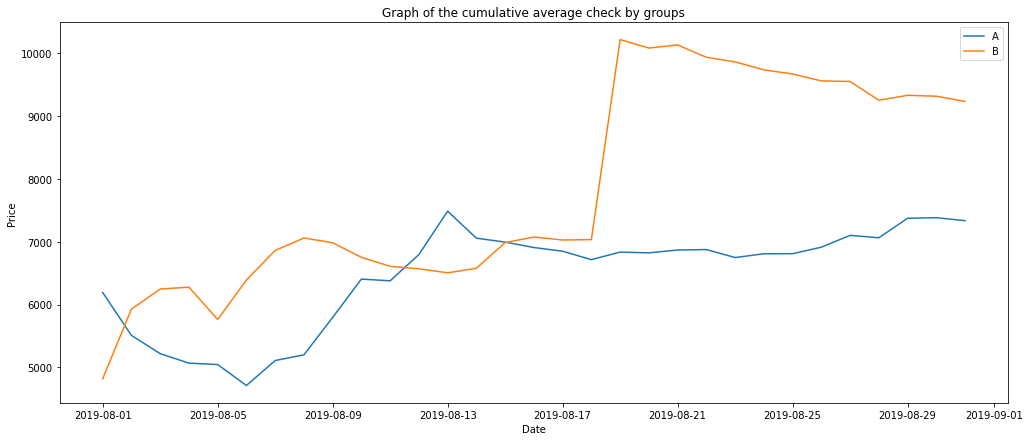

In [107]:
# Let's build a graph of the cumulative average check by groups

plt.figure(figsize=(17, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
 
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Graph of the cumulative average check by groups')
plt.legend()

The cumulative value of the average ticket continues to fluctuate, especially in segment B.

It's probably too early to make a decision.

Additional outlier analysis may be required.

Text(0.5, 1.0, 'Graph of the relative change of the cumulative average check')

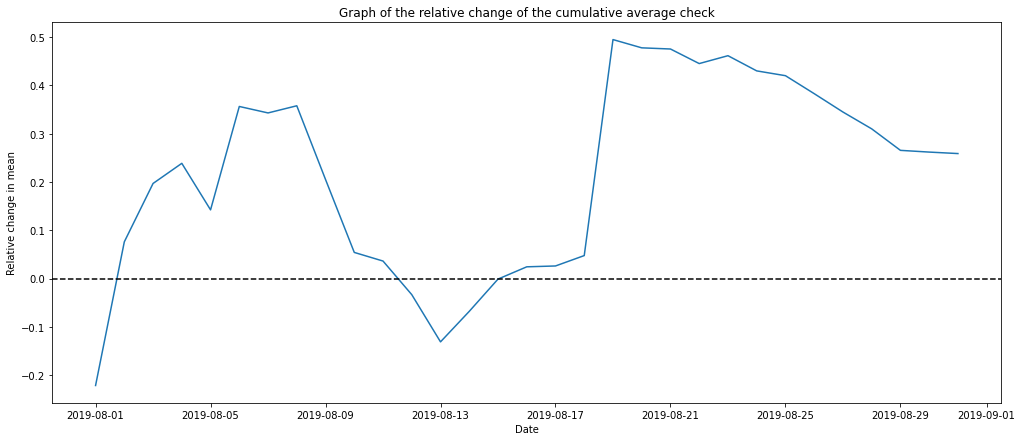

In [108]:
# Let's build graph of the relative change in the cumulative average check of group B to group A

# collecting data in one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# building the ratio of average bills
plt.figure(figsize=(17, 7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding x axis
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Relative change in mean')
plt.xlabel('Date')
plt.title('Graph of the relative change of the cumulative average check')

The graph shows that the test results changed dramatically several times during the test. Perhaps anomalous purchases were made these days.

(18109.0, 18140.0, 0.028, 0.038)

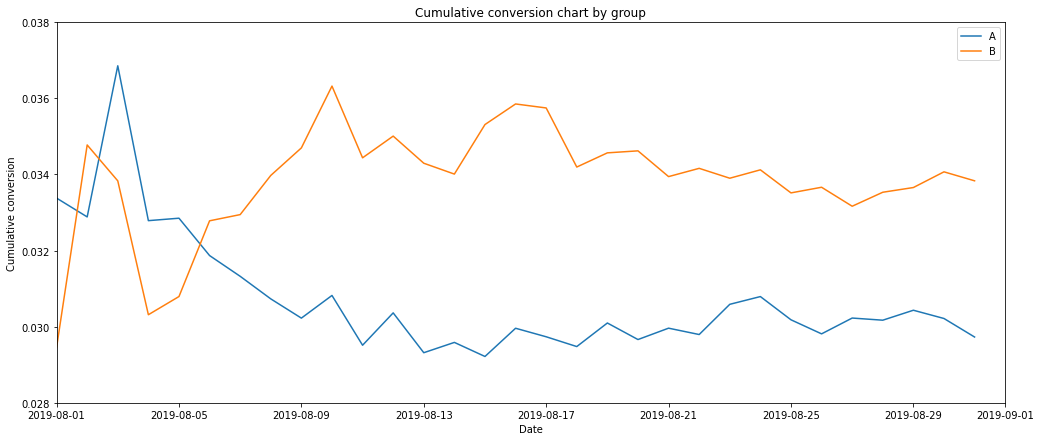

In [109]:
# Let's build cumulative conversion graph by group

#calculate cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# separating data by group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# separating data by group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# building graphs
plt.figure(figsize=(17, 7))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.ylabel('Cumulative conversion')
plt.xlabel('Date')
plt.title('Cumulative conversion chart by group')
plt.legend()

# setting the scale of the axes
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])

A few days after the start of the experiment, the conversion of segment B increased and was never lower than the conversion of segment A again.

Conversions of both segments were fixed at their own values.

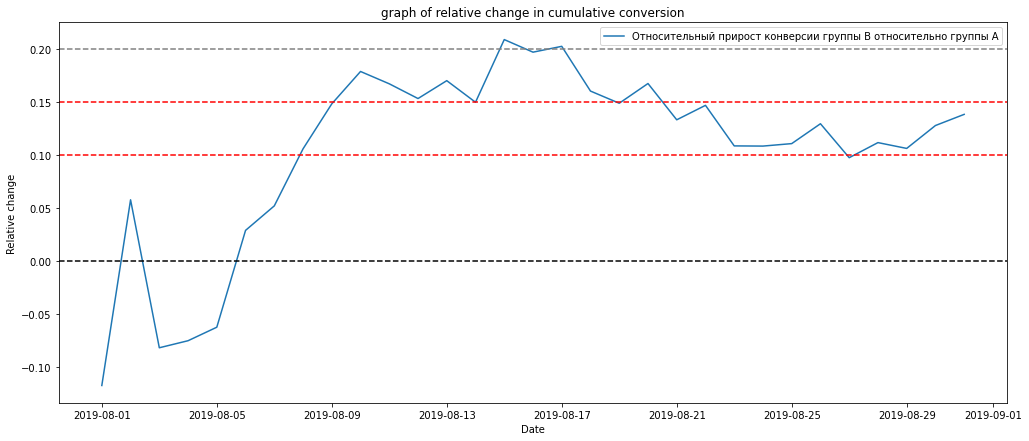

In [110]:
# graph of the relative change in the cumulative conversion of group B to group A.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# building graphs
plt.figure(figsize=(17, 7))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.ylabel('Relative change')
plt.xlabel('Date')
plt.title('graph of relative change in cumulative conversion')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.15, color='red', linestyle='--')
plt.axhline(y=0.10, color='red', linestyle='--')

Group B leads in terms of conversion. In the middle of the experiment, it reached the mark of 20%, then it dropped a little and fixed in the range of growth of 10-15% relative to group A

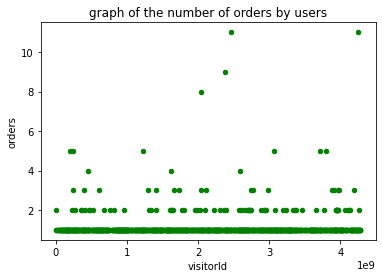

In [111]:
# scatter plot of the number of orders by users

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']


ordersByUsers.plot(x='visitorId', 
                   y='orders', 
                   kind = 'scatter', 
                   color= 'green')

plt.title('graph of the number of orders by users')
plt.show()

The graph shows how many orders a single user makes.

1 or 2 3 orders is a very popular practice

4 to 5. quite rare cases

8 - 10 - abnormal

we will get a more detailed look at this situation by calculating 95 and 99 persyntiles in the next step.

In [112]:
# 95th and 99th percentile of orders per user.

# method np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
orders_per_user_persentil = np.percentile(ordersByUsers['orders'],[90,95,99])
print(orders_per_user_persentil)

[1. 2. 4.]


90% of users place only 1 order

no more than 5% of users make 2 or more orders

no more than 1% of users make 4 or more orders


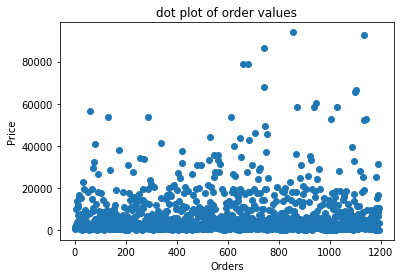

In [113]:

orders_filtered = orders[orders['revenue'] < 200000]

x_values = pd.Series(range(0, len(orders_filtered['revenue'])))
plt.scatter(x_values, orders_filtered['revenue'])

plt.title('dot plot of order values')
plt.ylabel('Price')
plt.xlabel('Orders')
plt.show()

Most orders in the range from 0 - 200,000

Anything above can be considered an outlier.


In [114]:
# 95th and 99th order value percentiles. The border for abnormal orders.

orders_persentil = np.percentile(orders['revenue'],[90,95,99])
print(orders_persentil)

[18168.  28000.  58233.2]


No more than 5% of orders have a check more than 28,000 

No more than 1% of orders have a check more expensive than 58,233 


#### Let's calculate the statistical significance of differences in conversion between groups according to "raw" data.

Ho - conversions between groups when calculating on 'raw data' are

H1 - conversions between groups when calculating 'raw data' are not equal

In [115]:
# Mann-Whitney test
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']


ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#Output p-value to compare conversion between groups. Round p-value to 5 decimal places
print("p-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


# Calculate and output the relative difference in conversion between groups. Round to 3 decimal places
print(
    "relative difference in conversion between groups: {0:.3f}".format(
        (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum())
        / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
        - 1
    )
)


p-value: 0.01679
relative difference in conversion between groups: 0.138


p-value is less than 0.05, so we reject the null hypothesis. Raw data analysis showed that there are statistically significant differences in conversion between groups. The relative increase in the conversion of group B to the conversion of group A is 13.8%

#### Let's calculate the statistical significance of the differences in the average order receipt between the groups according to the "raw" data.

Ho - statistically significant differences in the average check when calculating according to 'raw data' are equal between groups

H1 - statistically significant differences in the average check when calculated according to 'raw data' are not equal between groups

In [116]:

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
0.259


p-value is greater than 0.05 - we cannot disprove the null hypothesis.

there are no statistically significant differences in the average check between the groups

relative difference in the average check between segments 25%


#### Let's calculate the statistical significance of differences in conversion between groups according to "cleaned" data

Ho - conversion between groups when calculated from cleaned data is equal to 

H1 - conversion between groups when calculated from cleaned data is not equal

In [117]:
# Let's find anomalous users
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_per_user_persentil[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_per_user_persentil[1]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_persentil[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


In [118]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01304
0.173


Segment B is better than segment A

#### Let's calculate the statistical significance of the differences in the average order receipt between the groups according to the "cleaned" data.

Ho - the value of the average check between groups when calculating by cleared data is equal to

H1 - the value of the average check between groups when calculating by cleared data is not equal to

In [119]:
print('p_value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


p_value: 0.738
-0.020


p-value greater than 0.05 - we cannot reject the null hypothesis

there are no statistically significant differences in the average check between the groups

the relative difference in the average check between segments is -1%, while for "raw" data it is 25%

### Results

The average check does not change, and the conversion in group B is higher than the average by 10% throughout almost the entire experiment.

The experiment can be stopped and considered successful. With the increase in conversion, revenue will increase.